In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import seml
import seaborn as sns
import pandas as pd
import os
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter
import scvelo as scv
from utils import load_seml, model_type_map, model_palette
from scipy.stats import ttest_rel

/opt/modules/i12g/anaconda/envs/poisson_atac_new/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[rank: 0] Global seed set to 0
/data/nasif12/home_if12/martensl/github_repos/scatac_poisson_private/poisson_atac/utils.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  matplotlib.style.use("seaborn-poster")


In [3]:
scv.set_figure_params()

In [4]:
fig_path = '/s/project/poisson_atac/panels/revision2/Figure2/downsampling'

## Load data

In [5]:
results = load_seml('downsampling')

100%|██████████| 100/100 [00:00<00:00, 913.82it/s]


In [6]:
results = results.sort_values(
    ['config.data.dataset', 'config.model.model_type', 'config.scvi.seed', 'config.data.downsample']
)

In [7]:
results['config.model.model_type'].cat.remove_unused_categories(inplace=True)

/scratch/tmp/martensl/ipykernel_945124/1924600107.py:1: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  results['config.model.model_type'].cat.remove_unused_categories(inplace=True)


## Compute pvalues

In [8]:
df = results.loc[:, 
                 ['config.scvi.seed', 'config.model.model_type', \
                  'result.average_precision', 'config.data.downsample']
                ]

In [9]:
df = df.pivot(columns='config.model.model_type', index=['config.data.downsample', 'config.scvi.seed'])

In [10]:
df.columns = df.columns.droplevel(0)

In [11]:
pvalues = [
    ttest_rel(df.loc[i, model_type_map['binaryvi']], 
              df.loc[i, model_type_map['poissonvi']]).pvalue 
    for i in results['config.data.downsample'].unique() ]

In [12]:
formatted_pvalues = [f"p={p:.2e}" for p in pvalues]

/opt/modules/i12g/anaconda/envs/poisson_atac_new/lib/python3.8/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/opt/modules/i12g/anaconda/envs/poisson_atac_new/lib/python3.8/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/opt/modules/i12g/anaconda/envs/poisson_atac_new/lib/python3.8/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/opt/modules/i12g/anaconda/envs/poisson_atac_new/lib/python3.8/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/scratch/tmp/martensl/ipykernel_945124/1

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.1_Poisson VAE vs. 0.1_Binary VAE: p=2.56e-03
0.03


/opt/modules/i12g/anaconda/envs/poisson_atac_new/lib/python3.8/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/opt/modules/i12g/anaconda/envs/poisson_atac_new/lib/python3.8/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/opt/modules/i12g/anaconda/envs/poisson_atac_new/lib/python3.8/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/opt/modules/i12g/anaconda/envs/poisson_atac_new/lib/python3.8/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/scratch/tmp/martensl/ipykernel_945124/1

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.3_Poisson VAE vs. 0.3_Binary VAE: p=3.34e-06
0.1


/opt/modules/i12g/anaconda/envs/poisson_atac_new/lib/python3.8/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/opt/modules/i12g/anaconda/envs/poisson_atac_new/lib/python3.8/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/opt/modules/i12g/anaconda/envs/poisson_atac_new/lib/python3.8/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/opt/modules/i12g/anaconda/envs/poisson_atac_new/lib/python3.8/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/scratch/tmp/martensl/ipykernel_945124/1

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.5_Poisson VAE vs. 0.5_Binary VAE: p=8.89e-10
0.16


/opt/modules/i12g/anaconda/envs/poisson_atac_new/lib/python3.8/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/opt/modules/i12g/anaconda/envs/poisson_atac_new/lib/python3.8/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/opt/modules/i12g/anaconda/envs/poisson_atac_new/lib/python3.8/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/opt/modules/i12g/anaconda/envs/poisson_atac_new/lib/python3.8/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/scratch/tmp/martensl/ipykernel_945124/1

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.7_Poisson VAE vs. 0.7_Binary VAE: p=8.53e-13
0.21


/opt/modules/i12g/anaconda/envs/poisson_atac_new/lib/python3.8/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/opt/modules/i12g/anaconda/envs/poisson_atac_new/lib/python3.8/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/opt/modules/i12g/anaconda/envs/poisson_atac_new/lib/python3.8/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/opt/modules/i12g/anaconda/envs/poisson_atac_new/lib/python3.8/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/scratch/tmp/martensl/ipykernel_945124/1

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.9_Poisson VAE vs. 0.9_Binary VAE: p=2.47e-15
0.25


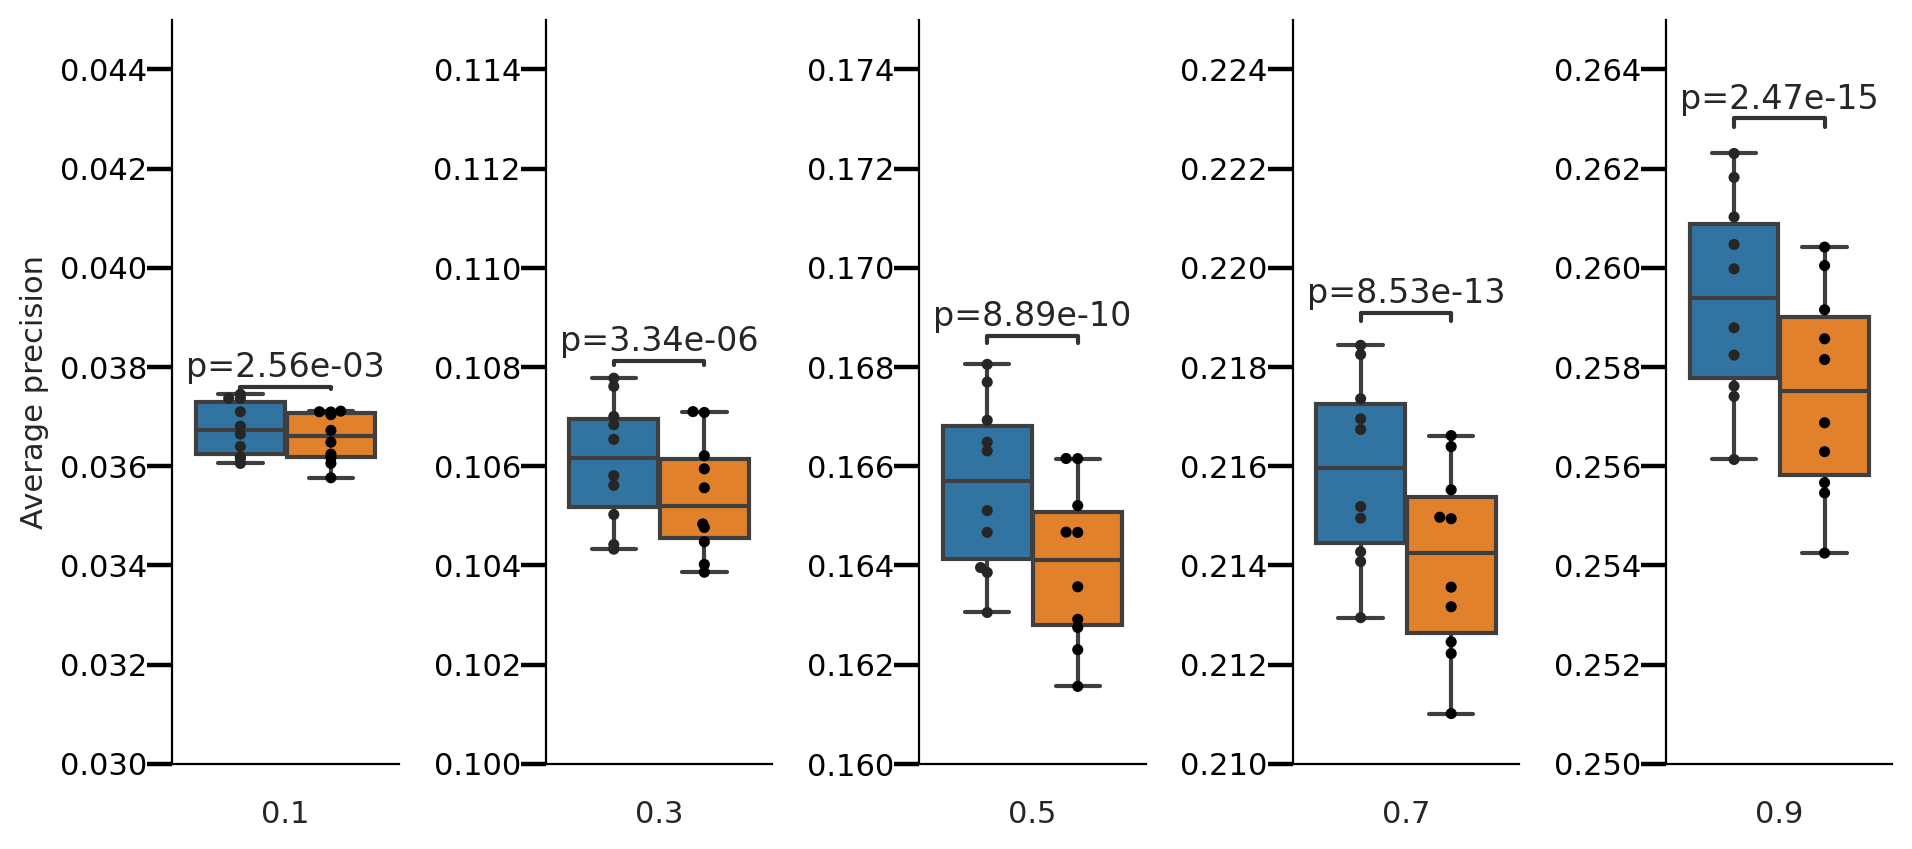

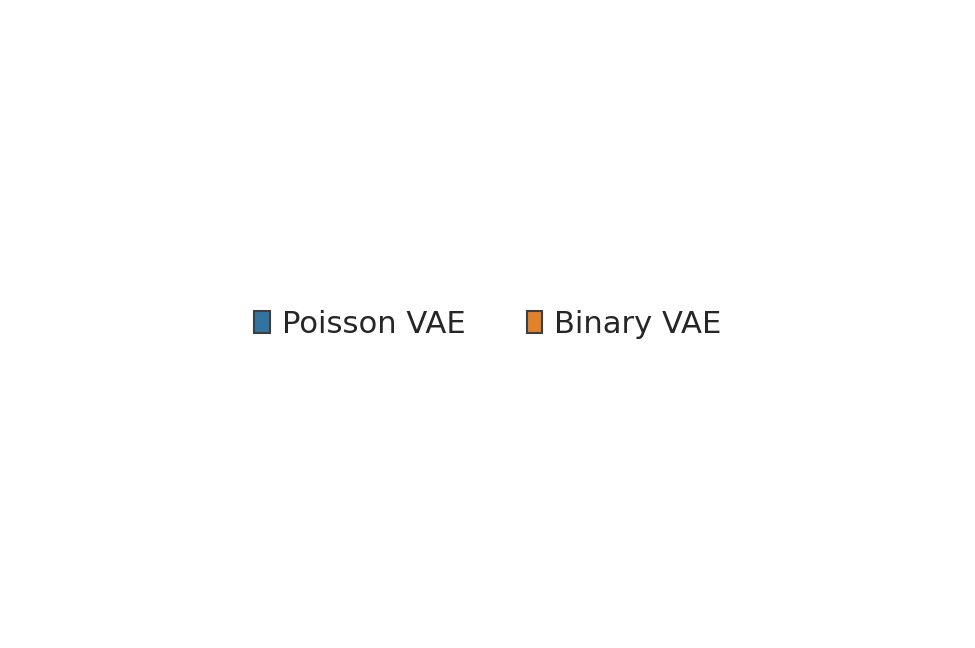

In [17]:
with mpl.rc_context(
    {"xtick.major.pad": 0, "xtick.minor.pad": 0, "ytick.major.pad": 0, "ytick.minor.pad": 0}
):
    sns.set_style("whitegrid")
    scv.set_figure_params()
    fig, axs = plt.subplots(
        ncols=5, 
        figsize=(10, 6), 
        gridspec_kw={'wspace': 0.65, 'left': 0.12}
    ) 
    plt.subplots_adjust(left=0.05, right=0.98, top=0.82, bottom=0.2)
    for i, downsample in enumerate(results['config.data.downsample'].unique()):
        data = results[results['config.data.downsample'] == downsample]
        y = 'result.average_precision'
        ax = sns.boxplot(
            data=data, 
            y=y, 
            x='config.data.downsample', 
            ax=axs[i],
            hue='config.model.model_type',
            palette=model_palette
        )
        
        annot = Annotator(
            ax, 
            [((downsample, model_type_map['poissonvi']),
              (downsample, model_type_map['binaryvi'])
             )], 
            data=data, 
            x='config.data.downsample',  
            y=y,
            hue='config.model.model_type',
            palette=model_palette
        )
        annot.set_custom_annotations([formatted_pvalues[i]])
        ax, test_results = annot.annotate()
        
        sns.swarmplot(
            data=data, 
            y=y, 
            x='config.data.downsample', 
            ax=axs[i],
            hue='config.model.model_type',
            dodge=True, color='black', size=4
        )
        
        #xlabel 
        ax.set_xlabel(downsample)
        ax.axes.get_xaxis().set_ticklabels([])

        #ylabel
        if i==0:
            ax.set_ylabel('Average precision')
        else:
            ax.set_ylabel("")
            ax.axes.get_yaxis().set_ticklabels([])


        ylim_bot = (data[y].min()*1000//10)*0.010
        print(ylim_bot)
        ylim_up = ylim_bot + 0.015
        ax.legend().remove()
        ax.set_ylim((ylim_bot, ylim_up))
        ax.axes.get_yaxis().set_major_formatter(FormatStrFormatter('%.3f'))
        ax.axes.tick_params(
        axis='y',      
        which='major', 
        left=True
        )
        sns.despine()
        plt.tight_layout()
        fig.savefig(os.path.join(fig_path, 'downsampling_comparision.png'))
        fig.savefig(os.path.join(fig_path, 'downsampling_comparision.pdf'))
            
#      
handles, labels = plt.gca().get_legend_handles_labels()

# Plot the legend separately
plt.figure()
plt.axis('off')  # Turn off the axis
plt.legend(handles[:2], labels[:2], ncol=3, loc='center', frameon=False)

# Show the plots
plt.savefig(os.path.join(fig_path, 'legend.pdf'))
plt.savefig(os.path.join(fig_path, 'legend.png'))
plt.show()
